In [144]:
#https://stattrek.com/descriptive-statistics/variability.aspx

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
from sklearn import svm
from sklearn.model_selection import train_test_split

import numpy as np

import math


In [267]:
import pybaseball as pyb
from pybaseball import statcast
#data = statcast(start_dt='2020-03-25', end_dt='2020-09-30')

In [294]:
df_fastballers = pd.read_csv('Fastball2020.csv')
fastballers = df_fastballers['Name'].to_list()
df = data.loc[data['player_name'].isin(fastballers)]
df = df.loc[df['pitch_type']=='FF']
grouped = df.groupby("player_name")

In [266]:
# Centroid Formula
# https://www.mathwords.com/c/centroid_formula.htm#:~:text=Mathwords%3A%20Centroid%20Formula&text=The%20coordinates%20of%20the%20centroid,on%20the%20x%2Dy%20plane.
# Distance between 2 points
# https://socratic.org/questions/59107ac4b72cff7430f3e681


# rather than averaging the distance from center, measure the variance
# or std of distance from center


#https://stackoverflow.com/questions/27405483/how-to-loop-over-grouped-pandas-dataframe
#https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

name = []
center_x=[]
center_y=[]
dfclist=[]
std_dfc_list = []

for group_name, df_group in grouped:
    # calculate the center
    x=(((df_group['release_pos_x'].sum())/df_group.shape[0]))
    y=(((df_group['release_pos_y'].sum())/df_group.shape[0]))
    center_x.append(x)
    center_y.append(y)
    # add player's name
    name.append(group_name)
    
    distance_from_center = []
  #  for row_index, row in df_group.iterrows():
    for index, row in df_group.iterrows():
        x1 = row['release_pos_x']
        x2 = x
        y1 = row['release_pos_y']
        y2 = y
        dist = ((x2-x1)**2)+((y2-y1)**2)
        dist = math.sqrt(dist)
        distance_from_center.append(dist)
    df_group['distance_from_center'] = distance_from_center
    dfc = sum(distance_from_center)/len(distance_from_center)
    std_dfc = np.std(distance_from_center)
    dfclist.append(dfc)
    std_dfc_list.append(std_dfc)
    
final = pd.DataFrame(
    {'Name': name,
     'center_x': center_x,
     'center_y': center_y,
     'average_distance_from_center': dfclist,
     'std_distance_from_center': std_dfc_list
    })  
#final.sort_values(by=, ignore_index=True, inplace=True)
final.sort_values(by='average_distance_from_center', ascending=False)[0:20]

,Name,center_x,center_y,average_distance_from_center,std_distance_from_center
30,David Peterson,1.693947,53.361974,0.472124,0.237453
56,Jose Berrios,-3.380877,53.971396,0.384461,0.136872
100,Steven Brault,2.638517,53.644276,0.361645,0.185573
37,Framber Valdez,0.880476,54.526667,0.348640,0.219806
67,Kyle Wright,-1.950841,54.301028,0.332157,0.132364
74,Madison Bumgarner,2.845978,53.634746,0.312760,0.370647
35,Dylan Cease,-1.298171,54.497143,0.296007,0.142948
108,Tyler Glasnow,-1.503577,52.864650,0.295055,0.223459
109,Tyler Mahle,-2.437415,53.885171,0.284732,0.126009
9,Antonio Senzatela,-2.575512,54.260945,0.276880,0.148299


In [322]:
df20 = pyb.pitching_stats(2020)
df = pd.merge(df20, final, on='Name')
df_sub = df[['Season', 'Name', 'Team', 'Age', 'W', 'L', 'ERA', 'WAR', 'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches', 'RS', 'IFH', 'BU', 'BUH', 'K/9', 'BB/9', 'K/BB', 'H/9', 'HR/9', 'AVG', 'WHIP', 'BABIP', 'average_distance_from_center', 'std_distance_from_center']]

In [365]:
df_fg = pd.read_csv('FanGraphsPitching20.csv')
test_df = pd.merge(df_fg, final, on='Name')

test_corr_table = test_df.corr(method='pearson', min_periods=1)[['average_distance_from_center', 'std_distance_from_center']].sort_values(by='std_distance_from_center', ascending=True)
test_corr_table['R2'] = test_corr_table['std_distance_from_center']**2
test_corr_table.sort_values(by='R2', ascending=False)

,average_distance_from_center,std_distance_from_center,R2
std_distance_from_center,0.692878,1.000000,1.000000
average_distance_from_center,1.000000,0.692878,0.480080
center_x,0.154151,0.294688,0.086841
xFIP,0.229337,0.178227,0.031765
FIP,0.138757,0.133106,0.017717
center_y,-0.014679,-0.129743,0.016833
L,-0.112425,-0.111742,0.012486
WAR,-0.129881,-0.094209,0.008875
BABIP,-0.088042,-0.085918,0.007382
K/9,-0.114031,-0.085033,0.007231


In [366]:
test_corr_table.to_csv('corr_table.csv')

In [299]:
walker = df.loc[df['player_name']=='Walker Buehler']

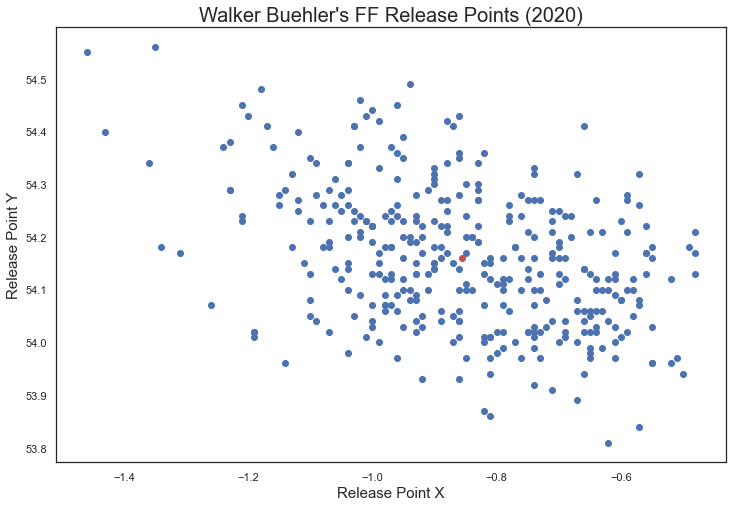

In [314]:
plt.figure(figsize = (12,8))
x = walker['release_pos_x']
y = walker['release_pos_y']
plt.scatter(x, y)
x2=(((walker['release_pos_x'].sum())/walker.shape[0]))
y2=(((walker['release_pos_y'].sum())/walker.shape[0]))
plt.scatter(x=x2, y=y2, color='r')
plt.title("Walker Buehler's FF Release Points (2020)", size=20)
plt.xlabel("Release Point X", size=15)
plt.ylabel("Release Point Y", size=15)
plt.show()

In [369]:
league_average = df['std_distance_from_center'].mean()
results = df[['Name', 'std_distance_from_center', 'BB/9']]
results['diff'] = results['std_distance_from_center'] - league_average
results = results.sort_values(by='diff', ascending=False)[0:10]
results.to_csv('highest_std_pitchers20.csv')

<ipython-input-369-12e6c8db1ccc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['diff'] = results['std_distance_from_center'] - league_average


In [370]:
league_average

0.11338257661819777